In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
%matplotlib inline

In [5]:
orbit_dir = 'json/'


orb_dict = {}

for i in os.listdir(orbit_dir):

    # print(i)

    if "" in i:

        #print(i)


        with open(orbit_dir+i, 'r') as f:

            dat = f.read()

        temp_dict = json.loads(dat)

        tempid = list(temp_dict['objects'])[0]


        elements = temp_dict['objects'][tempid]['elements']

        orb_dict[tempid] = elements

        


In [18]:
a = []
asig = []
i = []
isig =[]
e = []
esig = []
weighted_rms = []

for obj in orb_dict:

    temp_dic = orb_dict[obj]

    #print(orb_dict[i])

    a.append(temp_dic['a'])
    #asig.append(temp_dic['a sigma'])

    e.append(temp_dic['e'])
    #esig.append(temp_dic['e sigma'])


    i.append(temp_dic['i'])
    #isig.append(temp_dic['i sigma'])

    weighted_rms.append(temp_dic['weighted_rms_residual'])

a = np.array(a)
asig = np.array(asig)
i = np.array(a)
isig =np.array(isig)
e = np.array(e)
esig = np.array(esig)
weighted_rms = np.array(weighted_rms)

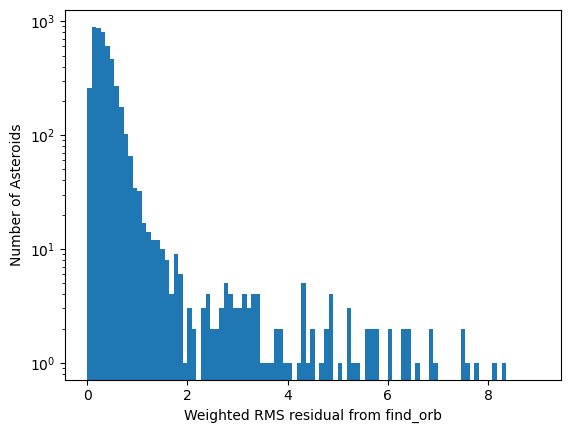

In [26]:
plt.hist(weighted_rms,bins=np.linspace(0,9,100))
ax = plt.gca()
ax.set_yscale('log')

plt.xlabel('Weighted RMS residual from find_orb')
plt.ylabel('Number of Asteroids')
plt.show()

In [136]:
orbit_dir = 'json/'


obs_dict = {}

sortlist = os.listdir(orbit_dir)

sortlist.sort()

multi_night = []

for i in sortlist:

    # print(i)

    if "elea" in i:

        #print(i)


        with open(orbit_dir+i, 'r') as f:

            dat = f.read()

        temp_dict = json.loads(dat)

        tempid = list(temp_dict['objects'])[0]


        elements = temp_dict['objects'][tempid]['elements']
        obs = temp_dict['objects'][tempid]['observations']

        obs_dict[tempid] = elements

        jds = np.array([i['JD'] for i in obs['residuals']])
        jdlist = (list(jds-jds[0]))

        jdlist.insert(0,-1)
        jdlist=np.array(jdlist)
        jdiff = np.diff(jdlist)
        #print(jdiff)
        
        biggap = jdiff > 1
        
        #print(biggap)
        
        first_good = not biggap[0]
        last_good = not biggap[-1]
        
        #print(first_good)
        #print(last_good)
        
        n_clusters = len(jdiff[biggap])+1
        
        
        #initializing some variables
        new_day = True
        
        day = 0
        
        n_obs_today = 0
        
        
        
        reject = []
        
        for j, jd in enumerate(jds):
            new_day = biggap[j]
            #print(new_day)
        
            if new_day:
                oldcount = n_obs_today
                
                day += 1
                n_obs_today = 1
                #print("date index: {}, n obs on this date: {}".format(day-1,oldcount))
                if oldcount < 2:
                    reject.append(True)
        
                else:
                    reject.append(False)
        
                #print("date index: {}, n obs on this date: {}".format(day,))
        
            else:
        
                n_obs_today += 1
        
                
        
        # for the last day
        #print("date index: {}, n obs on this date: {}".format(day,n_obs_today))
        
        if n_obs_today < 2:
            reject.append(True)
                
            
        
        n_days = (len(reject) - np.count_nonzero(reject))

        if n_days > 1:


            multi_night.append(tempid)

            
        
        
        
                
        
                


In [137]:
multi_night

['a000000',
 'a000002',
 'a000004',
 'a000005',
 'a000006',
 'a000007',
 'a000008',
 'a000009',
 'a000011',
 'a000012',
 'a000013',
 'a000014',
 'a000015',
 'a000016',
 'a000017',
 'a000018',
 'a000020',
 'a000021',
 'a000022',
 'a000023',
 'a000024',
 'a000025',
 'a000026',
 'a000027',
 'a000028',
 'a000029',
 'a000030',
 'a000031',
 'a000032',
 'a000033',
 'a000034',
 'a000035',
 'a000036',
 'a000037',
 'a000038',
 'a000040',
 'a000041',
 'a000042',
 'a000043',
 'a000046',
 'a000047',
 'a000048',
 'a000049',
 'a000050',
 'a000052',
 'a000053',
 'a000054',
 'a000055',
 'a000057',
 'a000058',
 'a000059',
 'a000060',
 'a000061',
 'a000062',
 'a000063',
 'a000064',
 'a000065',
 'a000066',
 'a000067',
 'a000068',
 'a000069',
 'a000071',
 'a000072',
 'a000073',
 'a000074',
 'a000075',
 'a000076',
 'a000077',
 'a000078',
 'a000079',
 'a000080',
 'a000081',
 'a000082',
 'a000083',
 'a000084',
 'a000085',
 'a000087',
 'a000088',
 'a000089',
 'a000090',
 'a000091',
 'a000093',
 'a000094',
 'a0

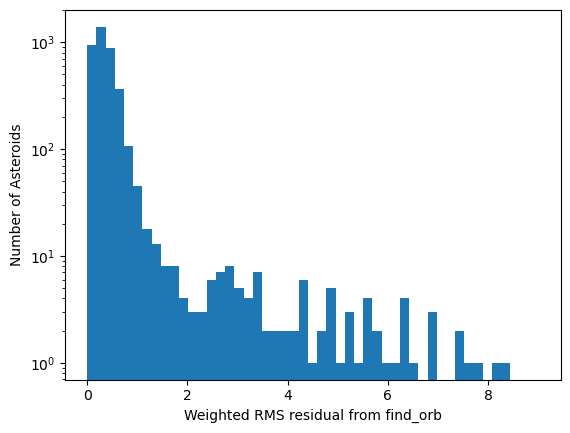

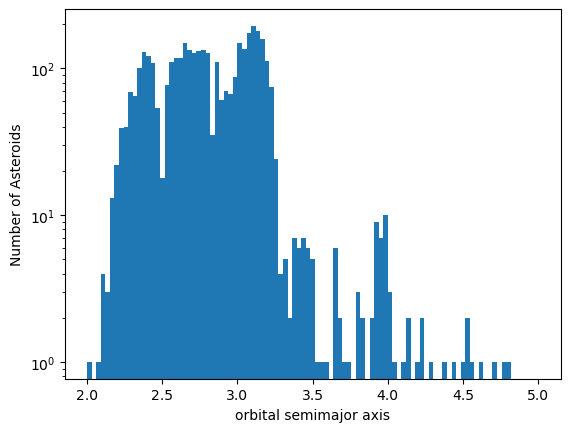

In [148]:
a = []
asig = []
i = []
isig =[]
e = []
esig = []
weighted_rms = []

for obj in multi_night:

    temp_dic = orb_dict[obj]

    #print(orb_dict[i])

    a.append(temp_dic['a'])
    try:
        asig.append(temp_dic['a sigma'])
    except:
        asig.append(99)
        
    e.append(temp_dic['e'])
    #esig.append(temp_dic['e sigma'])


    i.append(temp_dic['i'])
    #isig.append(temp_dic['i sigma'])

    weighted_rms.append(temp_dic['weighted_rms_residual'])

a = np.array(a)
asig = np.array(asig)
i = np.array(a)
isig =np.array(isig)
e = np.array(e)
esig = np.array(esig)
weighted_rms = np.array(weighted_rms)

plt.hist(weighted_rms,bins=np.linspace(0,9,50))
ax = plt.gca()
ax.set_yscale('log')

plt.xlabel('Weighted RMS residual from find_orb')
plt.ylabel('Number of Asteroids')
plt.show()

plt.hist(a,bins=np.linspace(2,5,100))
ax = plt.gca()
ax.set_yscale('log')

plt.xlabel('orbital semimajor axis')
plt.ylabel('Number of Asteroids')
plt.show()

In [181]:
import matplotlib as mpl



In [166]:
len(sigma_clipped_a)

3601

In [168]:
len(a)

3891

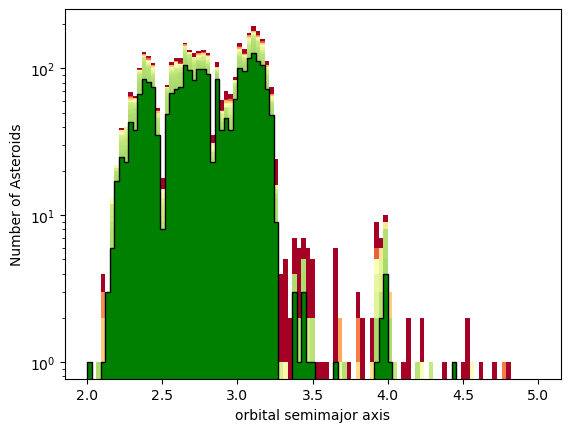

In [205]:
cmap = mpl.colormaps['RdYlGn']

asig_limit = 0.1 #au

sig_limits = np.linspace(0.2,0.01,100)
colors = cmap(np.linspace(0, 0.7, len(sig_limits)))
plt.hist(a,bins=np.linspace(2,5,100),color=colors[0])

for i,asig_limit in enumerate(sig_limits):

    sigma_clipped_a = a[asig<asig_limit]
    
    sigma_clipped_asig = asig[asig<asig_limit]
    
    
    plt.hist(sigma_clipped_a,bins=np.linspace(2,5,100),color=colors[i])


plt.hist(sigma_clipped_a,bins=np.linspace(2,5,100),color='green')
plt.hist(sigma_clipped_a,bins=np.linspace(2,5,100),color='black',histtype='step')
ax = plt.gca()
ax.set_yscale('log')
    
plt.xlabel('orbital semimajor axis')
plt.ylabel('Number of Asteroids')
plt.show()

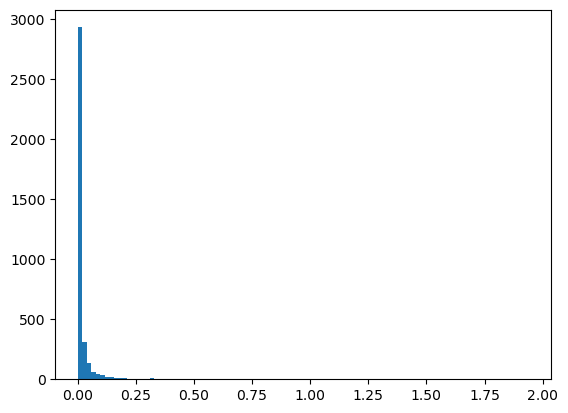

In [157]:
plt.hist(asig[asig<2],bins=100)
plt.show()